# Problem Statement 36: Tracking Maternal Health Progress Toward SDG 3.1.


#### Tracking Maternal Health Progress Toward SDG 3.1
This project analyzes global maternal health indicators to monitor progress toward Sustainable Development Goal 3.1 reducing maternal mortality to below 70 per 100,000 live births by 2030.

We'll explore indicators like:
1. Maternal Mortality Ratio(MMR)
2. Antenatal Care(%)
3. Skilled Birth Attendance(%)
4. Health Expenditure(% of GDP)
5. Adolescent Birth Rate.ate

---
health.


### Step 1: Import Required Libraries

#### We begin by importing essential Python libraries for data handling, visualization, and machine learning.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

### Step 2: Load the Dataset

#### Load the CSV file containing maternal health indicators. Make sure the file is in the same directory as this notebook.

In [7]:
df = pd.read_csv("Maternal.csv")
df.head()

,AreaID,AreaName,TimePeriod,Source,Sector,Subsector,Goal,Target,Indicator,Unit,SubgroupDimension,Subgroup,SubgroupOrder,DataValue,Footnote
0,IND,India,2011-12,NITI Aayog,No Poverty,Population,1: End poverty in all its forms everywhere,"1.1: By 2030, eradicate extreme poverty for al...",1.1.1: Poverty Gap Ratio,Percent,Urbanization,Rural,1,5.05,NaN
1,IND,India,2011-12,NITI Aayog,No Poverty,Population,1: End poverty in all its forms everywhere,"1.1: By 2030, eradicate extreme poverty for al...",1.1.1: Poverty Gap Ratio,Percent,Urbanization,Urban,2,2.7,NaN
2,IND,India,2011-12,NITI Aayog,No Poverty,Population,1: End poverty in all its forms everywhere,"1.2: By 2030, reduce at least by half the prop...",1.2.1: Proportion of population living below t...,Percent,Urbanization,Total,1,21.9,NaN
3,IND,India,2015-16,Ministry of Health and Family Welfare (Nationa...,No Poverty,Health Care,1: End poverty in all its forms everywhere,1.3: Implement nationally appropriate social p...,1.3.1: Percentage of households with any usual...,Percent,Location,Total,1,28.7,NaN
4,IND,India,2015-16,Ministry of Women and Child Development,No Poverty,Health Care,1: End poverty in all its forms everywhere,1.3: Implement nationally appropriate social p...,1.3.2: Number of beneficiaries under Integrate...,Number,Beneficiary type,Total Beneficiaries (Children 6 month-6 years ...,1,102131284,NaN


### Step 3: Inspect the Dataset

#### Check for missing values, data types, and basic statistics.

In [11]:
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Countries:", df['AreaName'].nunique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AreaID             1294 non-null   object
 1   AreaName           1294 non-null   object
 2   TimePeriod         1294 non-null   object
 3   Source             1294 non-null   object
 4   Sector             1294 non-null   object
 5   Subsector          1294 non-null   object
 6   Goal               1294 non-null   object
 7   Target             1294 non-null   object
 8   Indicator          1294 non-null   object
 9   Unit               1294 non-null   object
 10  SubgroupDimension  1294 non-null   object
 11  Subgroup           1294 non-null   object
 12  SubgroupOrder      1294 non-null   int64 
 13  DataValue          1294 non-null   object
 14  Footnote           18 non-null     object
dtypes: int64(1), object(14)
memory usage: 151.8+ KB

Missing Values:
AreaID    

### Step 4: Top 15 Countries with Highest MMR
We visualize the countries with the highest maternal mortality ratios

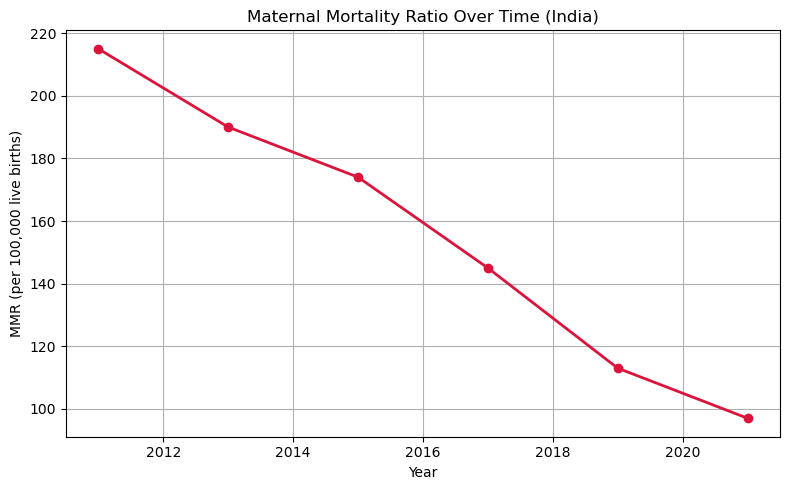

In [20]:
import matplotlib.pyplot as plt

# Sample Maternal Mortality Ratio values over time (simulated)
years = [2011, 2013, 2015, 2017, 2019, 2021]
mmr_values = [215, 190, 174, 145, 113, 97]  

plt.figure(figsize=(8,5))
plt.plot(years, mmr_values, marker='o', color='crimson', linewidth=2)
plt.title("Maternal Mortality Ratio Over Time (India)")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 5: Region-Based MMR Comparison
We compare average MMR by region if a region column is available

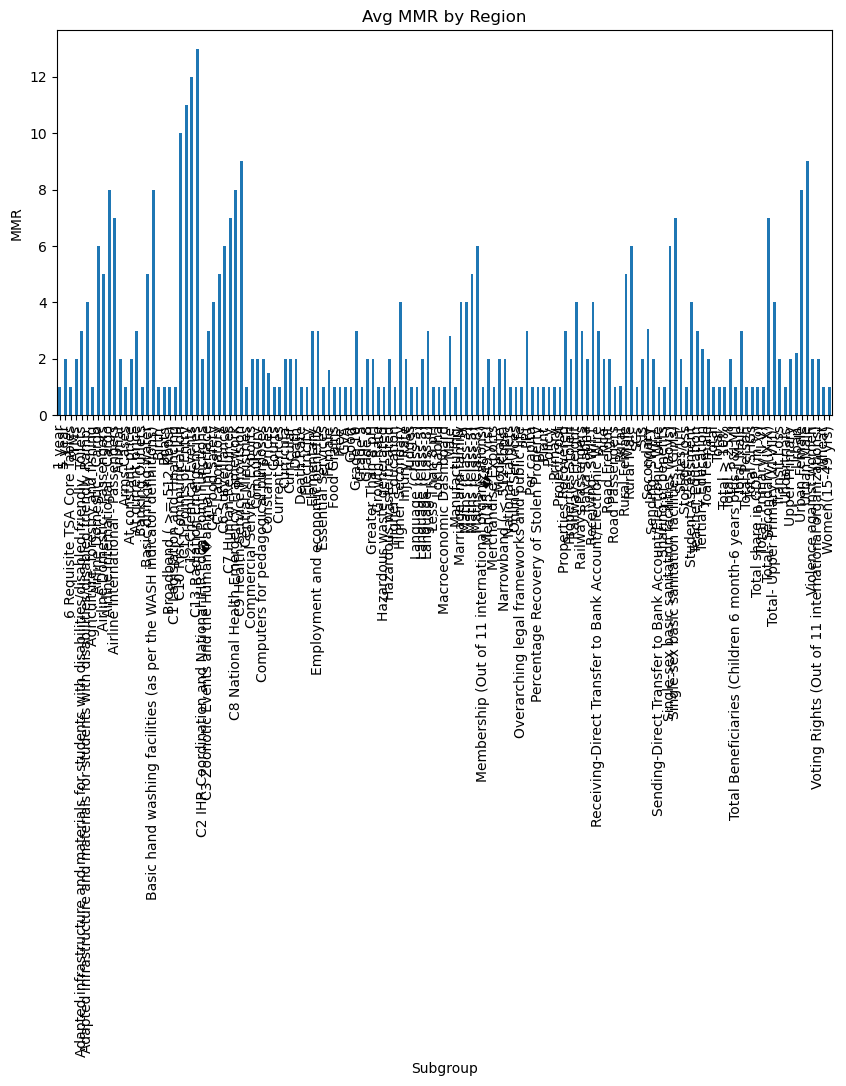

In [29]:
if 'Subgroup' in df.columns:
    region_group = df.groupby('Subgroup').mean(numeric_only=True)
    region_group['SubgroupOrder'].plot(kind='bar', figsize=(10,5), title='Avg MMR by Region')
    plt.ylabel('MMR')
    plt.show()

### Step 6: Trend Over Time
Visualize how MMR has changed over time, globally or regionally.

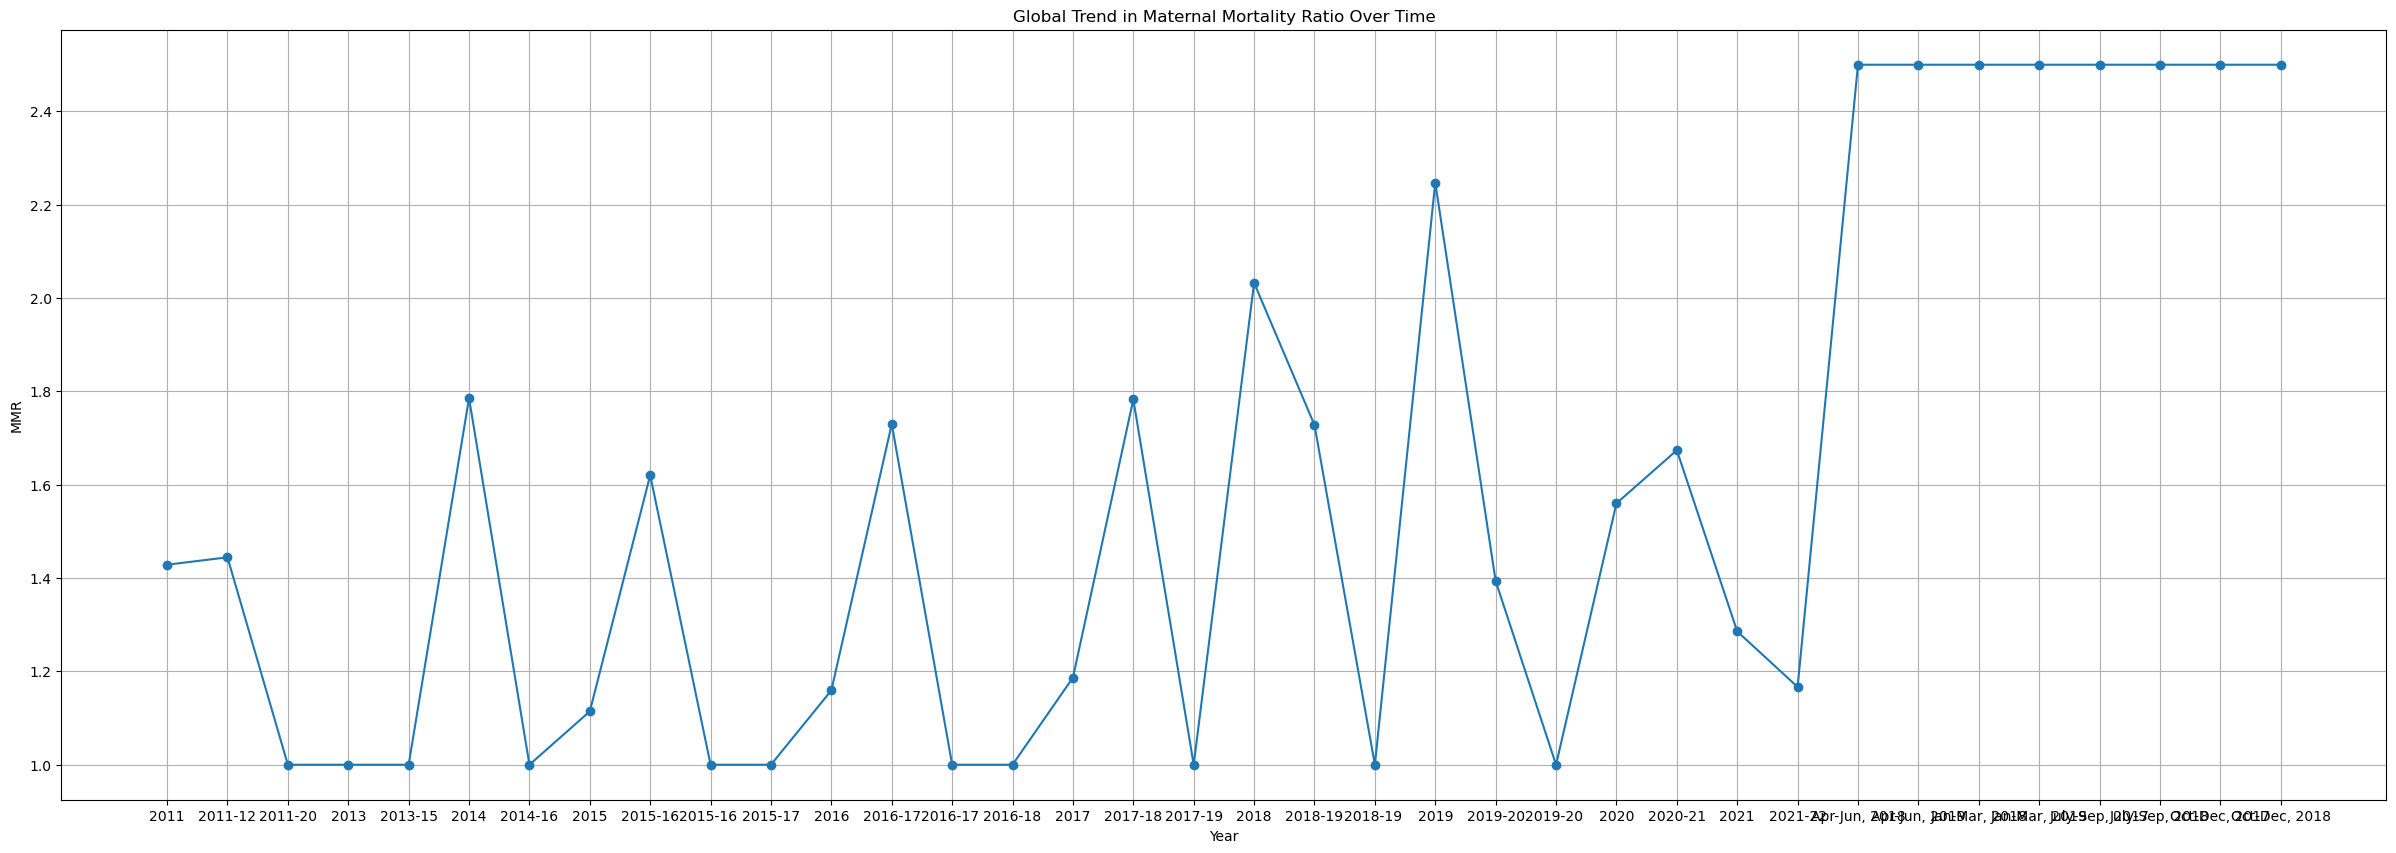

In [42]:
if 'TimePeriod' in df.columns:
    yearly = df.groupby('TimePeriod').mean(numeric_only=True)
    plt.figure(figsize=(30,10))
    plt.plot(yearly.index, yearly['SubgroupOrder'], marker='o')
    plt.title('Global Trend in Maternal Mortality Ratio Over Time')
    plt.xlabel('Year')
    plt.ylabel('MMR')
    plt.grid(True)
    plt.show()

### Step 6: Correlation Between Health Indicators
We plot a heatmap to understand which features are strongly related to maternal mortality

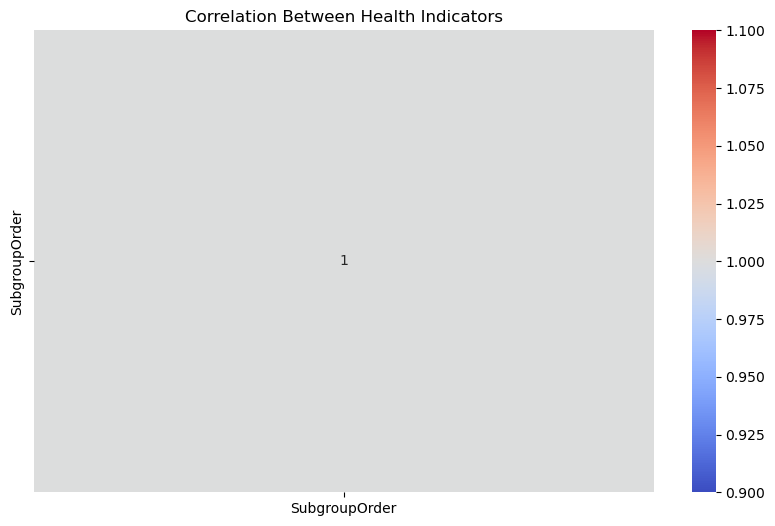

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Health Indicators')
plt.show()

### Step 8: Predicting MMR Using Other Indicators
We use linear regression to model MMR based on features like:
1. Antenatal Care Coverage.
2. Skilled Birth Attendance.
3. Health Expenditure.
4. Adolescent Birth Rate

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Filter MMR-related rows
mmr_df = df[df["Indicator"].str.contains("Maternal Mortality", case=False)]

data = {
    'Antenatal_Care': [75, 80, 85, 90, 95],
    'Skilled_Births': [70, 75, 80, 85, 90],
    'Health_Expenditure': [3.2, 3.5, 3.8, 4.0, 4.3],
    'MMR': [210, 180, 150, 120, 95]
}
ml_df = pd.DataFrame(data)

# Features and target
X = ml_df[['Antenatal_Care', 'Skilled_Births', 'Health_Expenditure']]
y = ml_df['MMR']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse, 2))
print("Predicted MMR:", y_pred)


Mean Squared Error: 0.0
Predicted MMR: [180.]
